In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitrox/healthcare-provider-fraud-detection-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/versions/1


In [ ]:
# prompt: open all csv files in /root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/versions/1

import os
import pandas as pd


d={}
# Assuming 'path' variable from previous code holds the directory path
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(filepath)
            print(f"Successfully opened: {filename}")
            # Now you can work with the dataframe 'df'
            # For example, print the first few rows:
            # print(df.head())
            d[filename]=df
        except pd.errors.ParserError:
            print(f"Error parsing CSV: {filename}")
        except Exception as e:  # Catch other potential errors
            print(f"An error occurred while opening {filename}: {e}")


Successfully opened: Train_Outpatientdata-1542865627584.csv
Successfully opened: Train-1542865627584.csv
Successfully opened: Test-1542969243754.csv
Successfully opened: Train_Beneficiarydata-1542865627584.csv
Successfully opened: Test_Outpatientdata-1542969243754.csv
Successfully opened: Train_Inpatientdata-1542865627584.csv
Successfully opened: Test_Inpatientdata-1542969243754.csv
Successfully opened: Test_Beneficiarydata-1542969243754.csv


In [ ]:
df1=d['Train_Outpatientdata-1542865627584.csv']

df2=d['Train_Inpatientdata-1542865627584.csv']

df3=d['Train-1542865627584.csv']

In [ ]:
df1.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [ ]:
df2.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [ ]:
df3.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [ ]:
# prompt: merge df1 and df3 full outer join

import pandas as pd
merged_df = pd.merge(df1, df3, on='Provider', how='inner')

merged_df = pd.merge(merged_df, df2, on='Provider', how='inner')


In [ ]:
merged_df.shape

(11007104, 57)

In [ ]:
merged_df=merged_df[:10000]

In [ ]:
for i in merged_df.columns:
  print(i)

BeneID_x
ClaimID_x
ClaimStartDt_x
ClaimEndDt_x
Provider
InscClaimAmtReimbursed_x
AttendingPhysician_x
OperatingPhysician_x
OtherPhysician_x
ClmDiagnosisCode_1_x
ClmDiagnosisCode_2_x
ClmDiagnosisCode_3_x
ClmDiagnosisCode_4_x
ClmDiagnosisCode_5_x
ClmDiagnosisCode_6_x
ClmDiagnosisCode_7_x
ClmDiagnosisCode_8_x
ClmDiagnosisCode_9_x
ClmDiagnosisCode_10_x
ClmProcedureCode_1_x
ClmProcedureCode_2_x
ClmProcedureCode_3_x
ClmProcedureCode_4_x
ClmProcedureCode_5_x
ClmProcedureCode_6_x
DeductibleAmtPaid_x
ClmAdmitDiagnosisCode_x
PotentialFraud
BeneID_y
ClaimID_y
ClaimStartDt_y
ClaimEndDt_y
InscClaimAmtReimbursed_y
AttendingPhysician_y
OperatingPhysician_y
OtherPhysician_y
AdmissionDt
ClmAdmitDiagnosisCode_y
DeductibleAmtPaid_y
DischargeDt
DiagnosisGroupCode
ClmDiagnosisCode_1_y
ClmDiagnosisCode_2_y
ClmDiagnosisCode_3_y
ClmDiagnosisCode_4_y
ClmDiagnosisCode_5_y
ClmDiagnosisCode_6_y
ClmDiagnosisCode_7_y
ClmDiagnosisCode_8_y
ClmDiagnosisCode_9_y
ClmDiagnosisCode_10_y
ClmProcedureCode_1_y
ClmProcedureCo

In [ ]:
#remove all duplicate rows (d)
#missing values (d)
#categorical column (d)
#feature importance (d)
#xgboost (d)
#SHAP
#Sagemaker

In [ ]:
# prompt: remove all duplicate rows in merged_df

merged_df = merged_df.drop_duplicates()

print(merged_df.shape)

(10000, 57)


In [ ]:
missing_percentage = merged_df.isnull().mean() * 100

# Display the result
print(missing_percentage)

BeneID_x                      0.00
ClaimID_x                     0.00
ClaimStartDt_x                0.00
ClaimEndDt_x                  0.00
Provider                      0.00
InscClaimAmtReimbursed_x      0.00
AttendingPhysician_x          0.00
OperatingPhysician_x         85.83
OtherPhysician_x             60.76
ClmDiagnosisCode_1_x          0.11
ClmDiagnosisCode_2_x         32.63
ClmDiagnosisCode_3_x         52.60
ClmDiagnosisCode_4_x         64.76
ClmDiagnosisCode_5_x         81.95
ClmDiagnosisCode_6_x         89.87
ClmDiagnosisCode_7_x         91.90
ClmDiagnosisCode_8_x         92.44
ClmDiagnosisCode_9_x         95.97
ClmDiagnosisCode_10_x       100.00
ClmProcedureCode_1_x        100.00
ClmProcedureCode_2_x        100.00
ClmProcedureCode_3_x        100.00
ClmProcedureCode_4_x        100.00
ClmProcedureCode_5_x        100.00
ClmProcedureCode_6_x        100.00
DeductibleAmtPaid_x           0.00
ClmAdmitDiagnosisCode_x      79.41
PotentialFraud                0.00
BeneID_y            

In [ ]:
# prompt: remove column having more than 85% missing values

import pandas as pd

# ... (Your existing code) ...

threshold = 85  # Define the threshold for missing value percentage

# Calculate the percentage of missing values for each column
missing_percentage = merged_df.isnull().mean() * 100

# Identify columns with more than the threshold percentage of missing values
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the identified columns
merged_df = merged_df.drop(columns=columns_to_drop)

print(merged_df.shape)
merged_df.columns


(10000, 38)


Index(['BeneID_x', 'ClaimID_x', 'ClaimStartDt_x', 'ClaimEndDt_x', 'Provider',
       'InscClaimAmtReimbursed_x', 'AttendingPhysician_x', 'OtherPhysician_x',
       'ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x',
       'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'DeductibleAmtPaid_x',
       'ClmAdmitDiagnosisCode_x', 'PotentialFraud', 'BeneID_y', 'ClaimID_y',
       'ClaimStartDt_y', 'ClaimEndDt_y', 'InscClaimAmtReimbursed_y',
       'AttendingPhysician_y', 'OperatingPhysician_y', 'AdmissionDt',
       'ClmAdmitDiagnosisCode_y', 'DeductibleAmtPaid_y', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y',
       'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y',
       'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y',
       'ClmDiagnosisCode_9_y', 'ClmProcedureCode_1_y'],
      dtype='object')

In [ ]:
# prompt: replace all missing values in column with majority value

import pandas as pd
# Iterate through each column in the DataFrame
for column in merged_df.columns:
    # Check if the column is of a numeric type
    if pd.api.types.is_numeric_dtype(merged_df[column]):
        # Calculate the mode (most frequent value) for the column, excluding NaN values
        mode_value = merged_df[column].mode(dropna=True)

        # If the mode has a value, fill NaN values with it
        if not mode_value.empty:
            merged_df[column].fillna(mode_value[0], inplace=True)
    else:
        # For non-numeric columns (likely categorical), fill NaN with the most frequent value (mode)
        mode_value = merged_df[column].mode(dropna=True)
        if not mode_value.empty:
          merged_df[column].fillna(mode_value[0], inplace=True)


<ipython-input-72-678b3441007b>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(mode_value[0], inplace=True)
<ipython-input-72-678b3441007b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# prompt: percentage of missing values in each column

missing_percentage = merged_df.isnull().mean() * 100
missing_percentage


,0
BeneID_x,0.0
ClaimID_x,0.0
ClaimStartDt_x,0.0
ClaimEndDt_x,0.0
Provider,0.0
InscClaimAmtReimbursed_x,0.0
AttendingPhysician_x,0.0
OtherPhysician_x,0.0
ClmDiagnosisCode_1_x,0.0
ClmDiagnosisCode_2_x,0.0


In [ ]:
#drop-'BeneID_x','ClaimID_x',Provider,BeneID_y,ClaimID_y
#claim process time=ClaimStartDt_x-ClaimEndDt_x  pt_y, staytime=AdmissionDt-DischargeDt
#cat-AttendingPhysician_x,OtherPhysician_x,PotentialFraud,AttendingPhysician_y,OperatingPhysician_y
pd.set_option('display.max_columns', None)
merged_df.head(5)

,BeneID_x,ClaimID_x,ClaimStartDt_x,ClaimEndDt_x,Provider,InscClaimAmtReimbursed_x,AttendingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,ClmDiagnosisCode_5_x,DeductibleAmtPaid_x,ClmAdmitDiagnosisCode_x,PotentialFraud,BeneID_y,ClaimID_y,ClaimStartDt_y,ClaimEndDt_y,InscClaimAmtReimbursed_y,AttendingPhysician_y,OperatingPhysician_y,AdmissionDt,ClmAdmitDiagnosisCode_y,DeductibleAmtPaid_y,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1_y,ClmDiagnosisCode_2_y,ClmDiagnosisCode_3_y,ClmDiagnosisCode_4_y,ClmDiagnosisCode_5_y,ClmDiagnosisCode_6_y,ClmDiagnosisCode_7_y,ClmDiagnosisCode_8_y,ClmDiagnosisCode_9_y,ClmProcedureCode_1_y
0,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY358876,1828,515,58881,27801,25000,0,5990,Yes,BENE12390,CLM41473,2009-03-07,2009-03-08,6000,PHY372869,PHY362864,2009-03-07,78605,1068.0,2009-03-08,305,4280,4148,V1251,4019,41400,25000,79029,2724,V5861,3995.0
1,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY358876,1828,515,58881,27801,25000,0,5990,Yes,BENE26429,CLM51334,2009-05-16,2009-05-18,3000,PHY311624,PHY399012,2009-05-16,5789,1068.0,2009-05-18,326,53551,71515,2449,56210,25000,42731,56400,4019,4019,4523.0
2,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY358876,1828,515,58881,27801,25000,0,5990,Yes,BENE30660,CLM53116,2009-05-28,2009-06-01,4000,PHY400645,PHY362864,2009-05-28,7840,1068.0,2009-06-01,073,4359,7843,78321,4019,V1582,78659,3659,2724,4019,3995.0
3,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY358876,1828,515,58881,27801,25000,0,5990,Yes,BENE34402,CLM56165,2009-06-18,2009-06-24,11000,PHY400645,PHY375925,2009-06-18,0389,1068.0,2009-06-24,856,0389,5849,49121,3481,486,4019,2639,78552,78791,9702.0
4,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY358876,1828,515,58881,27801,25000,0,5990,Yes,BENE35908,CLM55026,2009-06-10,2009-06-12,11000,PHY408250,PHY428833,2009-06-10,42781,1068.0,2009-06-12,252,42789,56210,28521,41400,53540,33818,2724,60000,412,3771.0


In [ ]:
merged_df.drop(columns=['BeneID_x','ClaimID_x','Provider','BeneID_y','ClaimID_y'], inplace=True)

In [ ]:
merged_df['ClaimStartDt_x'] = pd.to_datetime(merged_df['ClaimStartDt_x'])
merged_df['ClaimEndDt_x'] = pd.to_datetime(merged_df['ClaimEndDt_x'])

# Calculate the difference and store it in a new column 'DateDiff'
merged_df['ClaimDur_x'] = (merged_df['ClaimEndDt_x'] - merged_df['ClaimStartDt_x']).dt.days



In [ ]:
merged_df['ClaimStartDt_y'] = pd.to_datetime(merged_df['ClaimStartDt_y'])
merged_df['ClaimEndDt_y'] = pd.to_datetime(merged_df['ClaimEndDt_y'])

# Calculate the difference and store it in a new column 'DateDiff'
merged_df['ClaimDur_y'] = (merged_df['ClaimEndDt_y'] - merged_df['ClaimStartDt_y']).dt.days


In [ ]:
merged_df['AdmissionDt'] = pd.to_datetime(merged_df['AdmissionDt'])
merged_df['DischargeDt'] = pd.to_datetime(merged_df['DischargeDt'])

# Calculate the difference and store it in a new column 'DateDiff'
merged_df['Stay_Time'] = (merged_df['DischargeDt'] - merged_df['AdmissionDt']).dt.days

In [ ]:
merged_df.drop(columns=['ClaimStartDt_y','ClaimEndDt_y','ClaimStartDt_x','ClaimEndDt_x','AdmissionDt','DischargeDt'], inplace=True)

In [ ]:
columns_to_encode = ['AttendingPhysician_x','OtherPhysician_x','PotentialFraud','AttendingPhysician_y','OperatingPhysician_y','ClmDiagnosisCode_1_x','ClmDiagnosisCode_2_x','ClmDiagnosisCode_3_x','ClmDiagnosisCode_4_x','ClmDiagnosisCode_5_x','ClmAdmitDiagnosisCode_x','ClmDiagnosisCode_1_y','ClmDiagnosisCode_2_y','ClmDiagnosisCode_3_y','ClmDiagnosisCode_4_y','ClmDiagnosisCode_5_y','ClmDiagnosisCode_6_y','ClmDiagnosisCode_7_y','ClmDiagnosisCode_8_y','ClmDiagnosisCode_9_y','ClmAdmitDiagnosisCode_y','DiagnosisGroupCode']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each column in the list
for column in columns_to_encode:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

# Display the modified DataFrame
print(merged_df)

      InscClaimAmtReimbursed_x  AttendingPhysician_x  OtherPhysician_x  \
0                           60                    96                32   
1                           60                    96                32   
2                           60                    96                32   
3                           60                    96                32   
4                           60                    96                32   
...                        ...                   ...               ...   
9995                        40                    99                11   
9996                        90                   119                11   
9997                        90                   119                11   
9998                        90                   119                11   
9999                        90                   119                11   

      ClmDiagnosisCode_1_x  ClmDiagnosisCode_2_x  ClmDiagnosisCode_3_x  \
0                        3           

In [ ]:
tgt=merged_df['PotentialFraud']
merged_df.drop(columns=['PotentialFraud'], inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_df, tgt, test_size=0.2, random_state=42)



In [ ]:
pd.set_option('display.max_columns', None)
X_train.head(5)

,InscClaimAmtReimbursed_x,AttendingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,ClmDiagnosisCode_5_x,DeductibleAmtPaid_x,ClmAdmitDiagnosisCode_x,InscClaimAmtReimbursed_y,AttendingPhysician_y,OperatingPhysician_y,ClmAdmitDiagnosisCode_y,DeductibleAmtPaid_y,DiagnosisGroupCode,ClmDiagnosisCode_1_y,ClmDiagnosisCode_2_y,ClmDiagnosisCode_3_y,ClmDiagnosisCode_4_y,ClmDiagnosisCode_5_y,ClmDiagnosisCode_6_y,ClmDiagnosisCode_7_y,ClmDiagnosisCode_8_y,ClmDiagnosisCode_9_y,ClmProcedureCode_1_y,ClaimDur_x,ClaimDur_y,Stay_Time
9254,400,202,42,166,94,39,3,11,0,18,6000,1618,1208,502,1068.0,537,694,615,163,331,709,311,933,566,273,6029.0,0,2,2
1561,60,83,39,42,54,29,26,2,0,18,4000,721,549,687,1068.0,202,361,387,1032,302,125,130,654,541,604,3995.0,0,3,3
1670,50,81,11,183,73,34,8,2,0,18,5000,1222,549,11,1068.0,624,17,17,533,15,877,130,141,452,130,3995.0,20,2,2
6087,2100,72,11,72,12,58,8,2,0,18,3000,1321,935,687,1068.0,166,862,749,659,143,95,202,151,299,865,8872.0,20,4,4
6669,0,88,11,156,12,9,8,2,0,18,18000,1163,120,325,1068.0,169,1022,677,659,146,333,896,103,580,407,3929.0,20,5,5


In [ ]:
# prompt: print unique values from each column in X_train

for col in X_train.columns:
    print(f"Unique values in column '{col}':")
    print(X_train[col].unique())
    print("-" * 20)


Unique values in column 'InscClaimAmtReimbursed_x':
[ 400   60   50 2100    0  500  240  100  900   90 1600 1900   40 2700
   10   30   70   80  200 3300  800  300   20  260  600  700 1800 2800
 2500 1000 2200 2000]
--------------------
Unique values in column 'AttendingPhysician_x':
[202  83  81  72  88 104 185  54 172 193 154  91 114  73 156 116 128  64
   5 186 165 151 129   6  15 163 115 102 177  99 158 178  21  49  60 159
 149  35   4 101  74  32  26 132  53  13  33  65 127 168  16 183 152 124
  96  87 175 107 131   0   1  37  52  93  39 173 195  90 198   8  23 194
  28 188  24  68 109 181 141  89 176 140 136  86 108 130 153  55 117  42
 201  30 137 187 170 157 111 147  38  92  82 199  67 106  45 200 169 138
  71 146 161  25 196 113  58 110   3 144 167  31  46  47 166 190 174  44
 171 121  51 182  79  48  36  61  50  70  97 150 118  62 180  14 155 197
  22  76 135  40   7  63  43  77  66  98  18 103 162 119 164  69 122 120
  27  11  17 134  94   9 184  34 123  41  59  85 105 189 1

In [ ]:
# prompt: random forest feature importance

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importance_df


,Feature,Importance
1,AttendingPhysician_x,0.165927
3,ClmDiagnosisCode_1_x,0.128662
2,OtherPhysician_x,0.109469
4,ClmDiagnosisCode_2_x,0.095818
0,InscClaimAmtReimbursed_x,0.090213
5,ClmDiagnosisCode_3_x,0.083270
9,ClmAdmitDiagnosisCode_x,0.066391
6,ClmDiagnosisCode_4_x,0.046904
11,AttendingPhysician_y,0.042095
26,ClaimDur_x,0.034463


In [ ]:
# prompt: select first 15 features from feature_importance_df

# Get the first 15 features
top_15_features = feature_importance_df.head(15)['Feature'].tolist()

top_15_features


['AttendingPhysician_x',
 'ClmDiagnosisCode_1_x',
 'OtherPhysician_x',
 'ClmDiagnosisCode_2_x',
 'InscClaimAmtReimbursed_x',
 'ClmDiagnosisCode_3_x',
 'ClmAdmitDiagnosisCode_x',
 'ClmDiagnosisCode_4_x',
 'AttendingPhysician_y',
 'ClaimDur_x',
 'ClmDiagnosisCode_5_x',
 'OperatingPhysician_y',
 'DeductibleAmtPaid_x',
 'ClmDiagnosisCode_5_y',
 'ClmAdmitDiagnosisCode_y']

In [ ]:
X_train=X_train[top_15_features]
X_test=X_test[top_15_features]

In [ ]:
# prompt: train xgboost model

import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # You can adjust hyperparameters as needed
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred=xgb_model.predict(X_test)

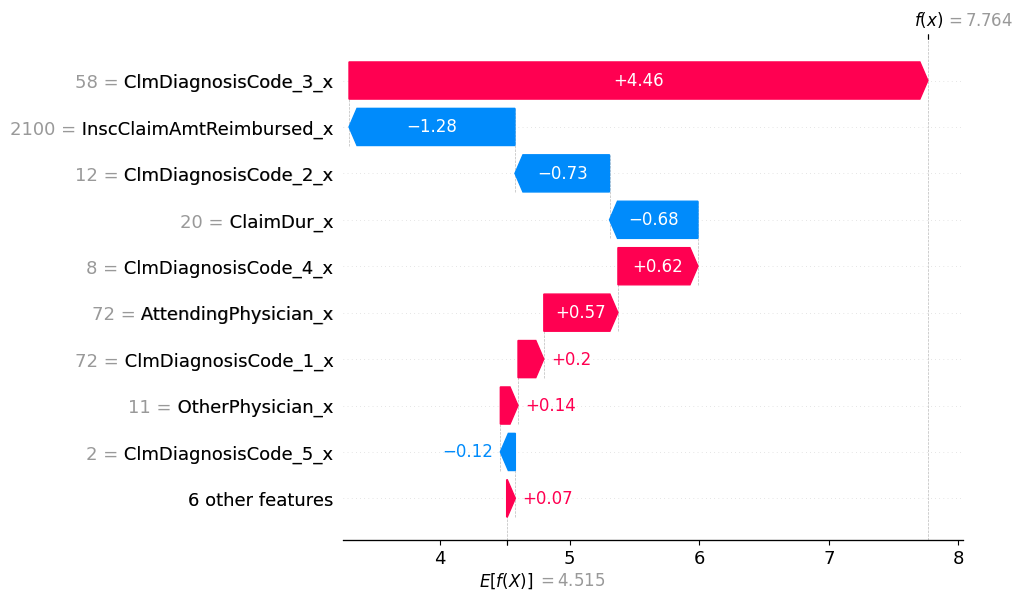

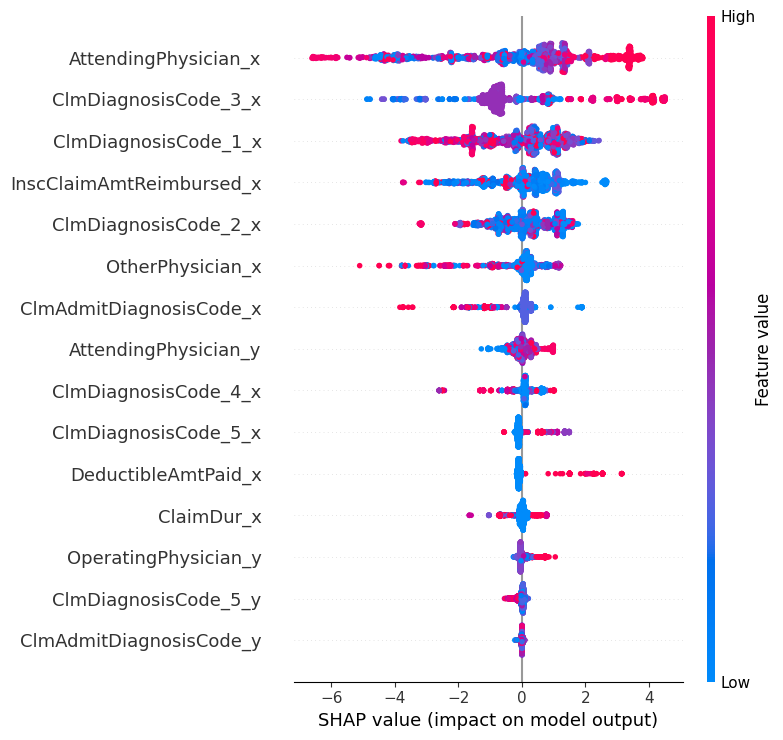

ValueError: Could not find feature named: InscClaimAmtReimbursed

In [ ]:
# prompt: SHAP on xgboost

!pip install shap

import shap

# Assuming 'xgb_model', 'X_train', and 'X_test' are defined from your previous code

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

# Dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("InscClaimAmtReimbursed", shap_values.values, X_test)
